# Homework 8  

**In the first problem I want you to think about loss functions for binary data. The second exercise prepares you for the "multinomial" case where we have more than 2 categories as outcome.**

1. **Fit a logistic regression `default ~ balance` to a random subset of 1000 rows of the default data from the ISLR library.**
    * Predict the default probability on a regular array of balance values between on the interval $[0; 3000]$ and plot the resulting sigmoid-shaped curve.
    * Find those 4 balances which yield predicted probabilities (closest to) $\hat{p} = [0.5, 0.05, 0.005, 0.0005]$.
    * Overlay these 4 points on the plot with a y value of $default=1$ (yes).
    * Compute the following loss functions for each of the four $(y_i, \hat{p}_i)$ pairs and dicsuss their merits/shortcomings:
        * Squared Error: $(y_i - \hat{p}_i)^2$
        * Log Loss: $y_i \cdot \log{\hat{p}_i}$
        * Hinge: `np.max(0, 1 - pHat * y)`
        * Accuracy: $y_i == (\hat{p}_i > 0.5)$**
2. **Multiclass logistic regression: The iris data set contains data on 3 flower types: "setosa", "versicolor", "virginica" (coded as integers $0, 1, 2$).**
    * Fit 3 separate logistic regressions with the binary outcome set to one flower type versus the others.
    * How could you combine these 3 models into one ?
    * Think about possible shortcomings of this "one verus the rest" strategy.

**Importing the libraries**

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

**Loading the dataset**

In [315]:
df = pd.read_csv(r"C:\Users\svawe\OneDrive\Desktop\Master\DataScience_01\data\Default.csv", index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.62507
2,No,Yes,817.180407,12106.13470
3,No,No,1073.549164,31767.13895
4,No,No,529.250605,35704.49394
5,No,No,785.655883,38463.49588


In [316]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462905
50%,823.636973,34552.644800
75%,1166.308387,43807.729275
max,2654.322576,73554.233500


## Task 1

* **Fit a logistic regression `default ~ balance` to a random subset of 1000 rows of the default data from the ISLR library.**

In [317]:
df = df.sample(n=1000, random_state=101)
df["default"].value_counts()

No     967
Yes     33
Name: default, dtype: int64

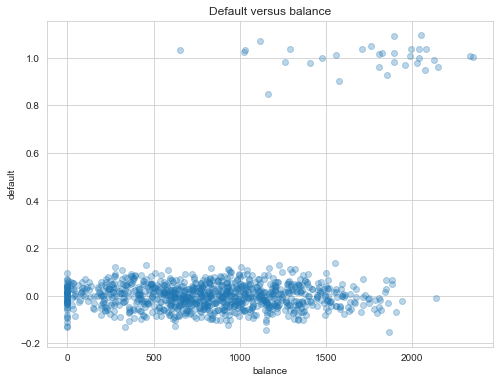

In [318]:
#add jitter to your plot:
df["defaultJitter"] = (df["default"]=="Yes") + 0.05*np.random.randn(len(df))

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(data=df, x="balance", y="defaultJitter", alpha=0.3)
plt.xlabel('balance')
plt.ylabel('default')
plt.title('Default versus balance');

In [319]:
y = df.default
X = df.balance.values.reshape(-1,1)

reg = LogisticRegression()
reg.fit(X,y)

pred_x = 1000
pred_y = np.exp(reg.intercept_ + pred_x * reg.coef_) / (1 +  np.exp(reg.intercept_ + pred_x * reg.coef_))
print(f"Intercept is at {reg.intercept_}, coefficient is {reg.coef_}, a student having a balance of {pred_x} has a default probability of {pred_y}")

Intercept is at [-10.3249383], coefficient is [[0.00528419]], a student having a balance of 1000 has a default probability of [[0.0064273]]


<AxesSubplot:xlabel='balance', ylabel='defaultJitter'>

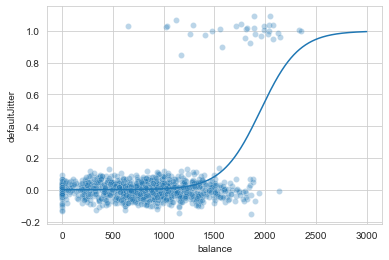

In [320]:
predict_array = np.arange(0,3001).reshape(-1,1)
predict_out = np.exp(reg.intercept_ + predict_array * reg.coef_) / (1 +  np.exp(reg.intercept_ + predict_array * reg.coef_))
plt.plot(predict_array, predict_out)
sns.scatterplot(x = "balance", y="defaultJitter", data=df, alpha=0.3)

In [321]:
pred_x = 4000
reg.predict_proba(np.array(pred_x).reshape(-1,1))
pred_y = np.exp(reg.intercept_ + pred_x * reg.coef_) / (1 +  np.exp(reg.intercept_ + pred_x * reg.coef_))

In [323]:
import math #math.log = ln
probs = [0.5, 0.05, 0.005, 0.0005]
points = []
true_points = [1,1,1,1]

for p in  probs:
    bal = -(math.log(1/p -1) + reg.intercept_)/reg.coef_ #this equation took me way longer than it should have
    points.append(int(bal))
    print(f"To find a default chance of {p}, the estimated balance is {bal}")
    

To find a default chance of 0.5, the estimated balance is [[1953.93152237]]
To find a default chance of 0.05, the estimated balance is [[1396.7144263]]
To find a default chance of 0.005, the estimated balance is [[952.20590879]]
To find a default chance of 0.0005, the estimated balance is [[515.60179376]]


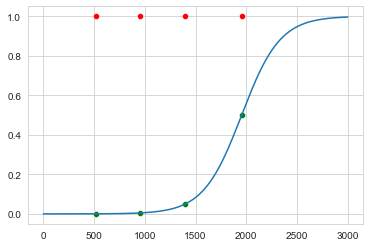

In [114]:
plt.plot(predict_array, predict_out)
sns.scatterplot(x=points, y=probs, color = "g"); #this is the predicted points
sns.scatterplot(x = points, y = true_points, color = "r"); #is this what the task wants? I find it confusing

   * Compute the following loss functions for each of the four $(y_i, \hat{p}_i)$ pairs and dicsuss their merits/shortcomings:
        * Squared Error: $(y_i - \hat{p}_i)^2$
        * Log Loss: $y_i \cdot \log{\hat{p}_i}$
        * Hinge: `np.max(0, 1 - pHat * y)`
        * Accuracy: $y_i == (\hat{p}_i > 0.5)$**

In [330]:
sqe = []
for i, p in enumerate(probs):
    z = (1 - p)**2
    sqe.append(z)
    print(f"The squared error for pair {i+1} is {z}")
print(f"The overall loss is {np.sum(sqe)}")
#Is it coincidence that this is almost Pi?!

#This penalized heavy errors harder than "little" errors
#However, these little errors are basically not penalized.

#This does not penalize heavy errors as hard as they should be.

#Max penalty of 1!

The squared error for pair 1 is 0.25
The squared error for pair 2 is 0.9025
The squared error for pair 3 is 0.990025
The squared error for pair 4 is 0.9990002500000001
The overall loss is 3.14152525


In [329]:
logloss = []
for i, p in enumerate(probs):
    z = 1 * np.log10(p)
    logloss.append(z)
    print(f"The Log Loss for pair {i+1} is {z}")
print(f"The overall loss is {np.sum(logloss)}")

#heavily penalizes heavy losses, may be useful to be applied in models, where
#heavy losses should be avoided as much as possible

#this loss is proportional -> 0.005 is -1 of the loss of 0.05 is -1 of the loss of 0.5.

The Log Loss for pair 1 is -0.3010299956639812
The Log Loss for pair 2 is -1.3010299956639813
The Log Loss for pair 3 is -2.3010299956639813
The Log Loss for pair 4 is -3.3010299956639813
The overall loss is -7.204119982655925


In [331]:
hinge = []
for i, p in enumerate(probs):
    z = max(0, 1 - p *1) 
    hinge.append(z)
    print(f"The Hinge Loss for pair {i+1} is {z}")
print(f"The overall loss is {np.sum(hinge)}")

#Overall the Hinge formula doesnt seem applicable in logistic regression? 
#It would never take the 0? since the formula is 1 - p*y wouldnt that mean if y = 0
#we always take the "1" in the loss?! Eventhough our prediction may be 0.001 

#From the results I found, the hingeloss seems to only weighing in the heavyness
#of a mistake a little. It seems to weigh "little" mistakes harder than the squared error

#This one is most confusing to me, as I dont understand what it istrying to achieve.



#not covered in this course.
#linear to a pojnt -> then no more loss  
#looks a lot like a linear version of the sigmoid -> at one point its saturated and always puts out 0

The Hinge Loss for pair 1 is 0.5
The Hinge Loss for pair 2 is 0.95
The Hinge Loss for pair 3 is 0.995
The Hinge Loss for pair 4 is 0.9995
The overall loss is 3.4444999999999997


In [139]:
acc = []
for i, p in enumerate(probs):
    z = 1 - (p > 0.5)
    acc.append(z)
    print(f"The Accuracy for pair {i+1} is {z}")
print(f"The overall loss is {np.sum(acc)}")
#accuracy has 0 penalization for heavy mistakes. However, for me it seems logical to
#not count a loss for when the prediction is right.
#This may be useful to reduce the overall number of mistakes made, but in real world
#often could be costly. This may be an interesting loss if the heaviness of a mistake
#does not matter for the model.

The Accuracy for pair 1 is 1
The Accuracy for pair 2 is 1
The Accuracy for pair 3 is 1
The Accuracy for pair 4 is 1
The overall loss is 4


## Task 2

* **Multiclass logistic regression: The iris data set contains data on 3 flower types: "setosa", "versicolor", "virginica" (coded as integers $0, 1, 2$).**
* Fit 3 separate logistic regressions with the binary outcome set to one flower type versus the others.
    * How could you combine these 3 models into one ?
    * Think about possible shortcomings of this "one verus the rest" strategy.
   
The iris data:

In [216]:
from sklearn import datasets

iris = datasets.load_iris()

#iris

In [218]:
flower_types = iris['target_names']

X_iris = pd.DataFrame(iris['data'], columns=['sepal_length','sepal_width','petal_length','petal_width'])
y_iris = pd.get_dummies(pd.DataFrame(list(map(lambda x: flower_types[x], iris['target'])), columns=['target']))

new_iris = X_iris.join(y_iris)
new_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target_setosa,target_versicolor,target_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [219]:
y_log1 = y_iris.target_setosa

reg1 = LogisticRegression()
reg1.fit(X_iris, y_log1)
reg1.predict_proba(X_iris.iloc[[3]])[0][1], reg1.predict_proba(X_iris.iloc[[53]])[0][1], reg1.predict_proba(X_iris.iloc[[103]])[0][1]

(0.977097058993751, 0.014107572730745204, 0.00025672675615157374)

In [220]:
y_log2 = y_iris.target_versicolor

reg2 = LogisticRegression()
reg2.fit(X_iris, y_log2)
reg2.predict_proba(X_iris.iloc[[3]])[0][1], reg2.predict_proba(X_iris.iloc[[53]])[0][1], reg2.predict_proba(X_iris.iloc[[103]])[0][1]

(0.25972919296739005, 0.6971072256981096, 0.4725733419201011)

In [221]:
y_log3 = y_iris.target_virginica

reg3 = LogisticRegression()
reg3.fit(X_iris, y_log3)
reg3.predict_proba(X_iris.iloc[[3]])[0][1], reg3.predict_proba(X_iris.iloc[[53]])[0][1], reg3.predict_proba(X_iris.iloc[[103]])[0][1]

(2.358925345969609e-06, 0.05138603886271162, 0.9136273213349974)

In [305]:
iris_in1 = []
for i in range(len(X_iris)):
    iris_in1.append(reg1.predict_proba(X_iris.iloc[:])[i][1])
iris_in2 = []
for i in range(len(X_iris)):
    iris_in2.append(reg2.predict_proba(X_iris.iloc[:])[i][1])
iris_in3 = []
for i in range(len(X_iris)):
    iris_in3.append(reg3.predict_proba(X_iris.iloc[:])[i][1])

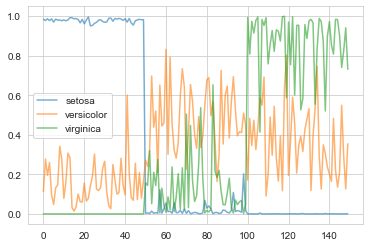

In [312]:
plt.plot(np.arange(0,150).reshape(-1,1), iris_in1, alpha = 0.6)
plt.plot(np.arange(0,150).reshape(-1,1), iris_in2, alpha = 0.6)
plt.plot(np.arange(0,150).reshape(-1,1), iris_in3, alpha = 0.6)
plt.legend(["setosa","versicolor","virginica"])

## How would I combine the 3 models?

One option I could think of is doing a weighted sum of all 3 models:
(intercept1+ intercept2 + intercept3)/3 -> (coef_1 + coef_2 + coef_3) /3?

However, I am not certain if this would actually work, because by averaging it should always be
around 0.5?


## Shortcoming of 3 1vs. others models:
* always have to test all three models
* alpha-mistake cumulation?
* if two models give more or less the same odds (which is possible according to graphic), how does one decide?!